# Introduction to Digital agro 

## Crop simulation models

____

### Mikhail Gasanov

E-mail: Mikhail.Gasanov[a]skoltech.ru

tg:@misha_grol


<img src="http://drive.google.com/uc?export=view&id=1Pm5Zysv5PxYcTAQDuPe0LNz_zbE0msEW">


## Clone utils and files from GitHub

In [2]:
# !git clone hhttps://github.com/EDSEL-skoltech/Intro_to_Digital_Agriculture.git
# %cd ./Intro_to_Digital_Agriculture/Crop_models 
# !pip install SALib
# !pip install pcse

# How to start with PCSE/WOFOST model

_____

### Documentation: [PCSE](https://pcse.readthedocs.io/)

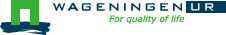



In [22]:
%matplotlib inline
import sys, os
import pcse
import pandas as pd
import matplotlib
import yaml
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:19:23) 
[GCC Clang 10.0.1 ] 
PCSE version: 5.4.2


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
wofostPP = pcse.start_wofost(mode="wlp")

You have just successfully initialized a PCSE/WOFOST object in the Python interpreter, which is in its initial state and waiting to do some simulation. We can now advance the model state for example with 1 day:


In [4]:
wofostPP.run()

Advancing the crop simulation with only 1 day, is often not so useful so the number of days to simulate can be specified as well:

In [5]:
wofostPP.run(days=10)

## Getting information about state and rate variables
Retrieving information about the calculated model states or rates can be done with the `get_variable()` method on a PCSE object. For example, to retrieve the leaf area index value in the current model state you can do:

### Leaf Area Index 


<img src="http://drive.google.com/uc?export=view&id=14nRP6TBQJLnIQ9Tv_HEvpvIvCe9gnXOO">

In [6]:
# Leaf Area Index at this date
print(wofostPP.day)
print('LAI', wofostPP.get_variable('LAI'))

2000-01-12
LAI 0.2870809817505803


The `get_variable()` method can retrieve any state or rate variable that is defined somewhere in the model. 

Finally, we can finish the crop season by letting it run until the model terminates because the crop reaches maturity or the harvest date:

In [7]:
wofostPP.run_till_terminate()

## Retrieving and displaying WOFOST output
We can retrieve the results of the simulation at each time step using  `get_output()`. In python terms this returns a list of dictionaries, one dictionary for each time step of the the simulation results. Each dictionary contains the key:value pairs of the state or rate variables that were stored at that time step.



In [8]:
output = wofostPP.get_output()

The most convenient way to handle the output from WOFOST is to used the `pandas` module to convert it into a dataframe. Pandas DataFrames can be converted to a variety of formats including excel, CSV or database tables.

In [9]:
df_crop = pd.DataFrame(output).set_index('day')

In [10]:
summary_output = wofostPP.get_summary_output()
msg = "Reached maturity at {DOM} with total biomass {TAGP:.1f} kg/ha, " \
      "a yield of {TWSO:.1f} kg/ha with a maximum LAI of {LAIMAX:.2f}."
for crop_cycle in summary_output:
    print(msg.format(**crop_cycle))

Reached maturity at 2000-05-31 with total biomass 15261.8 kg/ha, a yield of 7179.8 kg/ha with a maximum LAI of 6.13.


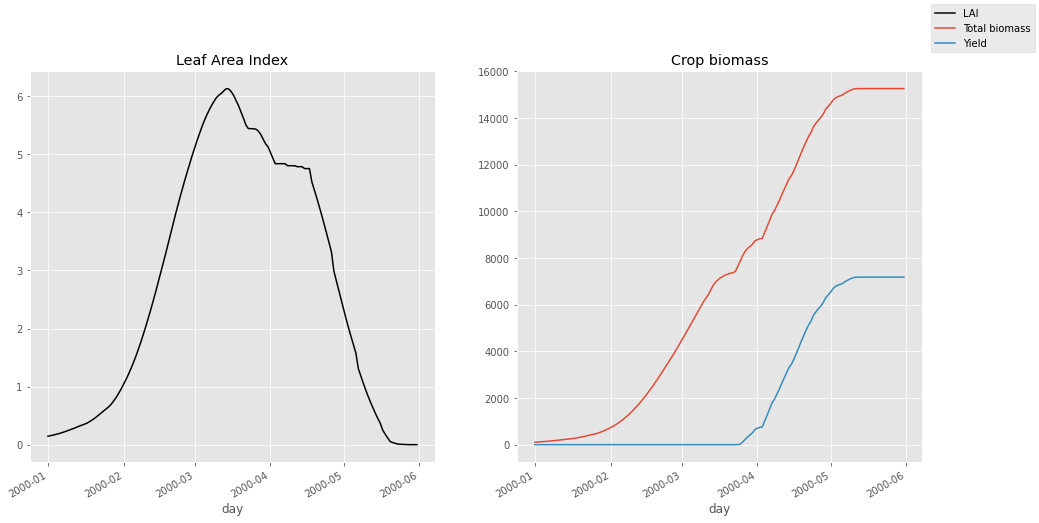

In [11]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
df_crop.LAI.plot(ax=axis1, label="LAI", color='k')
df_crop.TAGP.plot(ax=axis2, label="Total biomass")
df_crop.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index")
axis2.set_title("Crop biomass")
fig.autofmt_xdate()
r = fig.legend()

# Running PCSE/WOFOST with custom input data

This Jupyter notebook will show you how to read inputs from files for running PCSE/WOFOST.

thanks to **Allard de Wit**

**Prerequisites for running this notebook**

Several packages need to be installed for running PCSE/WOFOST:

  1. `PCSE` and its dependencies. See the [PCSE user guide](http://pcse.readthedocs.io/en/stable/installing.html) for more information;
  2. The `pandas` module for processing and storing WOFOST output;
  3. The `matplotlib` module for generating charts

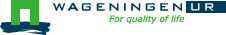



## Reading model parameters
### Crop parameters

In [12]:
data_dir = 'data/'

In [13]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'crop', 'SUG0601.crop')
cropdata = CABOFileReader(cropfile)

In [14]:
#potato
from pcse.fileinput import CABOFileReader
cropfile_potato = os.path.join(data_dir, 'crop', 'POT701.CAB')
cropdata_potato = CABOFileReader(cropfile_potato)

In [15]:
# Number of parameters for our crop 
len(cropdata_potato)

63

### Soil parameters
The soildata dictionary provides the parameter name/value pairs related to the soil type and soil physical properties. The number of parameters is variable depending on the soil water balance type that is used for the simulation. For this example, we will use the water balance for freely draining soils and use the soil file for medium fine sand: `ec3.soil`. This file is also taken from the soil files in the [WOFOST Control Centre](http://www.wageningenur.nl/wofost).

In [17]:
soilfile = os.path.join(data_dir, 'soil', 'ec3.soil')
soildata = CABOFileReader(soilfile)
print(soildata)

** $Id: ec3.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC3-medium fine
------------------------------------
SMW: 0.104 <class 'float'>
SMFCF: 0.3 <class 'float'>
SM0: 0.41 <class 'float'>
CRAIRC: 0.06 <class 'float'>
K0: 25.586 <class 'float'>
SOPE: 1.47 <class 'float'>
KSUB: 1.47 <class 'float'>
SPADS: 0.1 <class 'float'>
SPODS: 0.03 <class 'float'>
SPASS: 0.2 <class 'float'>
SPOSS: 0.05 <class 'float'>
DEFLIM: -0.3 <class 'float'>
RDMSOL: 120 <class 'int'>
SOLNAM: EC3-medium fine <class 'str'>
SMTAB: [-1.0, 0.41, 1.0, 0.398, 1.3, 0.389, 1.491, 0.38, 2.0, 0.34, 2.4, 0.287, 2.7, 0.241, 3.4, 0.148, 4.204, 0.104, 6.0, 0.09] <class 'list'>
CONTAB: [0.0, 1.408, 1.0, 0.167, 1.3, -0.215, 1.491, -0.638, 1.7, -0.854, 2.0, -1.155, 2.4, -1.796, 2.7, -2.26, 3.0, -2.745, 3.4, -3.357, 3.7, -3.824, 4.0, -4.276, 4.204, -4.678] <class 'list'>



### Site parameters

The site parameters provide ancillary parameters that are not related to the crop or the soil. Examples are the initial conditions of the water balance such as the initial soil moisture content (WAV) and the initial and maximum surface storage (SSI, SSMAX). Also the atmospheric $CO_{2}$ 
concentration is a typical site parameter. For the moment, we can define these parameters directly on the Python commandline as a simple python dictionary. However, it is more convenient to use the `WOFOST71SiteDataProvider` that documents the site parameters and provides sensible defaults:

In [18]:
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=100, CO2=360)
print(sitedata)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4, 'CO2': 360.0}


### Packaging all parameters
Finally, we need to pack the different sets of parameters into one variable using the `ParameterProvider`. This is needed because PCSE expects one variable that contains all parameter values. Using this approach has the additional advantage that parameter value can be easily overridden in case of running multiple simulations with slightly different parameter values:

In [19]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

## Agromanagement
The agromanagement inputs provide the start date of the agricultural campaign, the start_date/start_type of the crop simulation, the end_date/end_type of the crop simulation and the maximum duration of the crop simulation. The latter is included to avoid unrealistically long simulations for example as a results of a too high temperature sum requirement.

The agromanagement inputs are defined with a special syntax called [YAML](http://yaml.org/) which allows to easily create more complex structures which is needed for defining the agromanagement. The agromanagement file for sugar beet in Wageningen `sugarbeet_calendar.agro` can be read with the `YAMLAgroManagementReader`:

In [23]:
from pcse.fileinput import YAMLAgroManagementReader
#crop rotation for Moscow region
agromanagement_file = os.path.join(data_dir, 'agro', 'sugarbeet_calendar_Moscow_short.agro')
#agromanagement_file = os.path.join(data_dir, 'agro', 'sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2019-06-01:
    CropCalendar:
      crop_end_date: 2019-10-15
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2019-06-02
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar-beet-601
    StateEvents: null
    TimedEvents:
    - comment: All fertilizer amounts in kg/ha
      event_signal: apply_npk
      events_table:
      - 2019-06-22:
          K_amount: 122
          N_amount: 128
          P_amount: 25
      name: Timed N/P/K application table



We can create a crop rotation in the model


In [24]:
K_kg = 60
P_kg = 60
N_kg = 120
year=2017

yaml_agro = f"""
- {year}-05-01:
    CropCalendar:
        crop_name: 'sugar-beet'
        variety_name: 'sugar-beet-601'
        crop_start_date: {year}-05-20
        crop_start_type: sowing
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 250
    TimedEvents:
    -   event_signal: apply_npk
        name:  Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - {year}-06-22: {{N_amount : {N_kg}, P_amount: {P_kg}, K_amount: {K_kg}}}
    StateEvents: null
"""
agromanagement = yaml.safe_load(yaml_agro)
print(yaml_agro)
#crop_end_date: {year_date_1}-11-15


- 2017-05-01:
    CropCalendar:
        crop_name: 'sugar-beet'
        variety_name: 'sugar-beet-601'
        crop_start_date: 2017-05-20
        crop_start_type: sowing
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 250
    TimedEvents:
    -   event_signal: apply_npk
        name:  Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - 2017-06-22: {N_amount : 120, P_amount: 60, K_amount: 60}
    StateEvents: null



## Daily weather observations
Daily weather variables are needed for running the simulation. There are several data providers in PCSE for reading weather data, see the section on [weather data providers](http://pcse.readthedocs.io/en/stable/reference_guide.html#weather-data-providers) to get an overview.

For this example we will use weather data from an excel file which provides daily weather data for Wageningen for the period 2004 to 2008. We will read the data from the file using the ExcelWeatherDataProvider:

### NASA Weather Data Provider from NASA [DataBase](https://power.larc.nasa.gov/)

In [25]:
#NASA Weather system

#Sometimes it does not work (server), upload excel file
from pcse.db import NASAPowerWeatherDataProvider

In [26]:

weather = NASAPowerWeatherDataProvider(51, 5, force_update=True)


In [27]:
print(weather)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data
----Site characteristics----
Elevation:   38.5
Latitude:  51.000
Longitude:  5.000
Data available for 1983-07-01 - 2021-02-07
Number of missing days: 6



### Problems with missing days (~1-5 %)

In [28]:
def weather_loader(latitude, longitude):
    
    path = './data/meteo/'
    #API request to NASA database
    weather = NASAPowerWeatherDataProvider(latitude, longitude, force_update=True)

    # Print done if downloaded
    print('____DONE_____','latitude',latitude, 'longitude',longitude,'____')

    # export pcse.weather format to pandas df
    df_weather = pd.DataFrame(weather.export())


    #print('initial number of days:', len(df_weather))

    #create full range of dates
    r = pd.date_range(start=df_weather.DAY.min(), end=df_weather.DAY.max())


    #extend range of dates
    full_range_weather = df_weather.set_index('DAY').reindex(r).rename_axis('DAY').reset_index()
    missing_days = (full_range_weather.isna()).sum().sum()

    print('num_of_missing_days', missing_days)

    #fill weather with fill forward method in pandas
    filled_weather = full_range_weather.fillna(method='ffill', axis=0)

    #save as csv file

    filled_weather=filled_weather[['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN']]
    filled_weather['SNOWDEPTH'] = 'NaN'
    filled_weather[['IRRAD']] = filled_weather[['IRRAD']]/1000.
    filled_weather[['VAP']] = filled_weather[['VAP']]/10.
    filled_weather.DAY=filled_weather.DAY.dt.strftime('%Y%m%d')


    text = open(path+"pattern.csv", "r")
    text = ''.join([i for i in text]).replace("1111", str(weather.longitude))
    text = ''.join([i for i in text]).replace("2222", str(weather.latitude))
    text = ''.join([i for i in text]).replace("3333", str(weather.elevation))
    text = ''.join([i for i in text]).replace("4444", str(weather.angstA))
    text = ''.join([i for i in text]).replace("5555", str(weather.angstB))
    x = open(path+f'NASA_weather_latitude_{latitude}_longitude_{longitude}.csv',"w")
    x.writelines(text)
    x.close()

    path_to_save_csv_file = path+f'NASA_weather_latitude_{latitude}_longitude_{longitude}.csv'
    filled_weather.to_csv(path_to_save_csv_file, mode='a', header=False, index=False)

    #add info to weather database and save it to csv


    #LOAD WEATHER as csv file
    weather = pcse.fileinput.CSVWeatherDataProvider(path_to_save_csv_file)  
    return weather

In [29]:
weather = weather_loader(55,55)

____DONE_____ latitude 55 longitude 55 ____
num_of_missing_days 195


In [38]:
df_weather = pd.DataFrame(weather.export())

Text(0.5, 1.0, 'T°C Max')

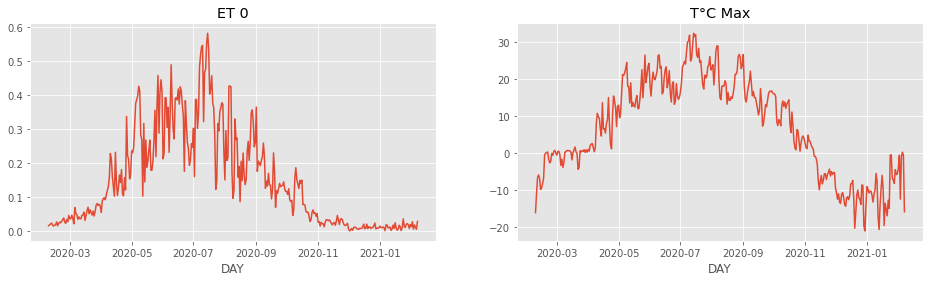

In [51]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
df_weather.set_index('DAY')['ET0'][-365:].plot(ax=ax1, label='ET0')
df_weather.set_index('DAY')['TMAX'][-365:].plot(ax=ax2, label='T MAX')
ax1.set_title('ET 0')
ax2.set_title('T°C Max')

## Importing, initializing and running a PCSE model

Internally, PCSE uses a simulation engine to run a crop simulation. This engine takes a configuration file that specifies the components for the crop, the soil and the agromanagement that need to be used for the simulation. So any PCSE model can be started by importing the engine and initializing it with a given configuration file and the corresponding parameters, weather data and agromanagement.

However, as many users of PCSE only need a particular configuration (for example the WOFOST model for potential production), preconfigured Engines are provided in `pcse.models`. For the sugarbeet example we will import the WOFOST model for water-limited simulation under freely draining soil conditions:

In [52]:
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, weather, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2018-01-21,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.014248,120.0,0.154055,18.486627
2018-01-22,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.023385,120.0,0.153960,18.475179
2018-01-23,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.023202,120.0,0.154166,18.499908
2018-01-24,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.028208,120.0,0.154058,18.486978
2018-01-25,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.026663,120.0,0.153811,18.457348


We can then run the simulation and retrieve the time series of daily simulation output using the get_output() method on the WOFOST object. Finally, we convert the simulation results to a pandas dataframe:

In [53]:
summary_output = wofsim.get_summary_output()

In [54]:
wofsim.get_summary_output()

[{'DVS': 1.6382678571428573,
  'LAIMAX': 4.361831916594967,
  'TAGP': 13001.942059594281,
  'TWSO': 8070.729386700372,
  'TWLV': 2295.0144341030245,
  'TWST': 2636.198238790885,
  'TWRT': 2072.5277589248244,
  'CTRAT': 17.5463787829338,
  'RD': 120.0,
  'DOS': datetime.date(2017, 5, 20),
  'DOE': datetime.date(2017, 6, 1),
  'DOA': datetime.date(2017, 7, 23),
  'DOM': None,
  'DOH': None,
  'DOV': None}]

In [55]:
msg = "Reached maturity at {DOM} with total biomass {TAGP} kg/ha "\
"and a yield of {TWSO} kg/ha."
print(msg.format(**summary_output[0]))

Reached maturity at None with total biomass 13001.942059594281 kg/ha and a yield of 8070.729386700372 kg/ha.


# Sensitivity analysis of models
___



<img src="http://drive.google.com/uc?export=view&id=1uijz-Bm9Mxwv8eI6CL8QsumiP7ISqnFo">
<img src="http://drive.google.com/uc?export=view&id=1dPvni3r4B3FqMFKugxtT8GfH1_W1jNNR">


In [ ]:
# !pip install SALib

     |████████████████████████████████| 860kB 3.3MB/s 
  Created wheel for SALib: filename=SALib-1.3.11-py2.py3-none-any.whl size=729665 sha256=93e720543725a20b1f31d6b4dcd5681574a59bb5c49e364a65b935ee9a92a0b0
  Stored in directory: /root/.cache/pip/wheels/62/ed/f9/a0b98754ffb2191b98324b96cbbeb1bd5d9598b39ab996b429
Successfully built SALib


## Sobol’ Sequences versus Random numbers and regular grid


<img src="http://drive.google.com/uc?export=view&id=1ezjA8aa50P08EUybwdDyo8JKCP7lU7zw">

In [42]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

__Docs [SALib](https://salib.readthedocs.io/en/latest/#)__

In this example, we will perform a Sobol’ sensitivity analysis of the _Ishigami_ function, shown below. The _Ishigami_ function is commonly used to test uncertainty and sensitivity analysis methods because it exhibits strong nonlinearity and nonmonotonicity.

$f(x)=\sin \left(x_{1}\right)+ \text{a}\, \operatorname{sin}^{2}\left(x_{2}\right)+ \text{b}\,  x_{3}^{4} \sin \left(x_{1}\right)$

In [43]:
problem = {
  'num_vars': 3,
  'names': ['x1', 'x2', 'x3'],
  'bounds': [[-np.pi, np.pi]]*3
}

In [118]:
# Generate samples
param_values = saltelli.sample(problem, 10, calc_second_order=True)
param_values.shape

(80, 3)

Here, `param_values` is a NumPy matrix. If we run `param_values.shape`, we see that the matrix is **8000 by 3**. The Saltelli sampler generated 8000 samples. The Saltelli sampler generates $N∗(2D+2)$ samples, where in this example $N$ is 1000 (the argument we supplied) and $D$ is 3 (the number of model inputs). The keyword argument `calc_second_order=False` will exclude second-order indices, resulting in a smaller sample matrix with $N∗(D+2)$ rows instead.


In [ ]:
# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals)
T_Si, first_Si, (idx, second_Si) = sobol.Si_to_pandas_dict(Si)

Parameter S1 S1_conf ST ST_conf
x1 -0.203434 0.660158 1.345837 2.206907
x2 0.838328 0.650453 0.716922 0.567090
x3 -0.592087 0.390549 0.459872 0.420236

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.208665 1.159449
x1 x3 1.165212 0.917190
x2 x3 0.268558 0.759311


Consider the model output as
\begin{eqnarray*}
Y=f(X)=f\left(X_{1}, \ldots, X_{p}\right),
\end{eqnarray*}
where $f$ in our case part of agro-model simulator, $X$ are $p$ varied input parameters and $Y$ is the predicted output. Following the techniques by Sobol we represent the multi-variate random function $f$ using Hoeffding decomposition:
\begin{equation}
f(X_1,\dots,X_p) = f_0 + \sum_i^p f_i + \sum_i^p\sum_{j>i}^p f_{ij} + \dots + f_{1\dots p},
\end{equation}
where $f_0$ is a constant term, $f_i = f_i(X_i)$ denotes main effects, $f_{ij} = f_{ij}(X_i, X_j)$ and others describe higher-order interactions. These terms can be written as
\begin{equation*}
\begin{split}
f_0 &= E(Y),\\
f_i &= E_{X_{\sim i}}(Y | X_i) - E(Y),\\
f_{ij} &= E_{X_{\sim ij}}(Y | X_i, X_j) - f_i - f_j - f_0,\\
\dots
\end{split}
\end{equation*}
where $E$ is mathematical expectation and $X_{\sim i}$ denotes all parameters except $i^\text{th}$. Under the assumption that the input parameters are independent, total variance $V(Y)$ of the crop yield can be decomposed as follows:
\begin{equation*}
V(Y) = \sum_i^p V_i + \sum_i^p\sum_{j>i}^p V_{ij} + \dots + V_{12\dots p},
\end{equation*}
where partial variances are
\begin{equation*}
\begin{split}
V_i &= V[f_i(X_i)] = V_{X_i}\left[E_{X_{\sim i}}(Y | X_i)\right],\\
V_{ij} &= V[f_{ij}(X_i,X_j)] = V_{X_iX_j}\left[E_{X_{\sim ij}}(Y | X_i, X_j)\right] - V_i - V_j,\\
\dots
\end{split}
\end{equation*}

## Sobol index (first order, second order, total index)

This way, sensitivity indices (SI) can be introduced as 
\begin{equation}
\Large
S_i = \frac{V_i}{V(Y)},~S_{ij} = \frac{V_{ij}}{V(Y)},~\dots
\end{equation}
In order to incorporate all of the interactions for a particular parameter, one can compute the total effect index:
\begin{equation}
S_{T_i} = \frac{E_{X_{\sim i}}\left[V_{X_i}(Y|X_{\sim i})\right]}{V(Y)} = 1 - \frac{V_{X_{\sim i}}\left[E_{X_i}(Y | X_{\sim i})\right]}{V(Y)}
\end{equation}


From this assumption we can conclude:
\begin{equation}
\Large
0 \leq S_i \leq S_{T_i} \leq 1
\end{equation}

More -
* [Wiki](https://en.wikipedia.org/wiki/Sobol_sequence)
* [Habr](https://habr.com/ru/post/440892/)
* Feature selection [Skoltech ML 2020](https://github.com/adasegroup/ML2020_lectures/blob/master/lecture9/Lecture_9_Model_Feature_Selection_Sensitivity.pdf)

# Sensitivity analysis of WOFOST model 

<img src="http://drive.google.com/uc?export=view&id=1OPZ0xIFpc8Ku3wtt6XffKy2QKLashDWP">

## Install modules 

In [ ]:
  from SALib.sample import saltelli
  from SALib.analyze import sobol
  from SALib.test_functions import Ishigami
  import numpy as np
  import pandas as pd

## Parameters

In [ ]:
NPK = {
    'num_vars':3,
    'names':['N_kg', 'P_kg', 'K_kg'],
    'bounds':[[30., 60.],
              [60., 90.],
              [100., 130.]]
}

In [ ]:
Soil_parameters = {
  'num_vars':5,
    'names':['SMV', 'SMFCF', 'SM0', 'CRAIRC', 'K0'],
    'bounds':[[0.7, 1.3],
              [0.1, 0.5],
              [0.2, 0.6],
             [0.04, 0.08],
             [22.5, 27.5]]}

## Generate input parameters

In [ ]:
param_values = saltelli.sample(Soil_parameters, 10)

$n = N \times (D \times 2 +2)$

In [ ]:
param_values.shape

(120, 5)

## Loop for yield prediction

In [ ]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'agro', './sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
#print(agromanagement)
Soil_parameters = {
  'num_vars':5,
    'names':['SMV', 'SMFCF', 'SM0', 'CRAIRC', 'K0'],
    'bounds':[[0.7, 1.3],
              [0.1, 0.5],
              [0.2, 0.6],
             [0.04, 0.08],
             [22.5, 27.5]]}
param_values = saltelli.sample(Soil_parameters, N=10, calc_second_order=True)

Soil parameters in [PCSE model](https://pcse.readthedocs.io/en/stable/code.html?highlight=K0#pcse.soil.WaterbalanceFD) 

In [ ]:
def sensitivity_soil(soil_parameters):
    SMV, SMFCF, SM0, CRAIRC, K0 = soil_parameters 
    soildata['SMV'] = SMV
    soildata['SMFCF'] = SMFCF
    soildata['SM0'] = SM0
    soildata['CRAIRC'] = CRAIRC
    soildata['K0'] = K0
    parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
    wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
    wofsim.run_till_terminate()
    #df_results = pd.DataFrame(wofsim.get_output())
    #df_results = df_results.set_index("day")
    #df_results.tail()
    summary_output = wofsim.get_summary_output()
    yield_list.append(summary_output[0]['TWSO'])

In [ ]:
%%time
yield_list = []
param_values = saltelli.sample(Soil_parameters, 10, calc_second_order=True)
for step in range(len(param_values)):
    sensitivity_soil(param_values[step])
    print(param_values[step])

[ 0.83183594  0.13867188  0.40742187  0.06707031 23.90136719]
[ 1.24433594  0.13867188  0.40742187  0.06707031 23.90136719]
[ 0.83183594  0.11835938  0.40742187  0.06707031 23.90136719]
[ 0.83183594  0.13867188  0.55976563  0.06707031 23.90136719]
[ 0.83183594  0.13867188  0.40742187  0.06003906 23.90136719]
[ 0.83183594  0.13867188  0.40742187  0.06707031 22.84667969]
[ 0.83183594  0.11835938  0.55976563  0.06003906 22.84667969]
[ 1.24433594  0.13867188  0.55976563  0.06003906 22.84667969]
[ 1.24433594  0.11835938  0.40742187  0.06003906 22.84667969]
[ 1.24433594  0.11835938  0.55976563  0.06707031 22.84667969]
[ 1.24433594  0.11835938  0.55976563  0.06003906 23.90136719]
[ 1.24433594  0.11835938  0.55976563  0.06003906 22.84667969]
[ 1.13183594  0.33867188  0.20742188  0.04707031 26.40136719]
[ 0.94433594  0.33867188  0.20742188  0.04707031 26.40136719]
[ 1.13183594  0.31835938  0.20742188  0.04707031 26.40136719]
[ 1.13183594  0.33867188  0.35976562  0.04707031 26.40136719]
[ 1.1318

In [ ]:
np_yield = np.array(yield_list)
Si = sobol.analyze(Soil_parameters, np_yield, print_to_console=False)

In [ ]:
Si_dict = dict(Si) 
Si_df = pd.DataFrame()
Si_df = Si_df.append(pd.Series(Si_dict['S1']), ignore_index=True)
Si_df = Si_df.append(pd.Series(Si_dict['ST']), ignore_index=True)
Si_df = Si_df.append(pd.Series(Si_dict['S1_conf']), ignore_index=True)
Si_df = Si_df.append(pd.Series(Si_dict['ST_conf']), ignore_index=True)
Si_df = Si_df.T
Si_df.columns = ['Si', 'ST', 'Si_conf', 'ST_conf']
Si_df.rename(index={0:'SMV',1:'SMFCF', 2:'SM0', 3:'CRAIRC', 4:'K0'}, inplace=True)
Si_df

,Si,ST,Si_conf,ST_conf
SMV,0.000000,0.000000,0.000000,0.000000
SMFCF,-0.077417,0.284878,0.839456,0.638290
SM0,0.267504,0.381437,0.693409,0.688329
CRAIRC,0.000000,0.000000,0.000000,0.000000
K0,0.000000,0.000000,0.000000,0.000000


Is it ok?


\begin{equation}
\Large
0 \leq S_i \leq S_{T_i} \leq 1
\end{equation}

### For 5 years

In [ ]:
def sensitivity_weather(year):
    K_kg = 60
    P_kg = 60
    N_kg = 120
    year_date=year
    print(year)
    print(year_date)
    yaml_agro = f"""
    - {year_date}-06-01:
        CropCalendar:
            crop_name: 'sugar-beet'
            variety_name: 'sugar-beet-601'
            crop_start_date: {year_date}-06-02
            crop_start_type: emergence
            crop_end_date: {year_date}-10-15
            crop_end_type: harvest
            max_duration: 300
        TimedEvents:
        -   event_signal: apply_npk
            name:  Timed N/P/K application table
            comment: All fertilizer amounts in kg/ha
            events_table:
            - {year_date}-06-22: {{N_amount : {N_kg}, P_amount: {P_kg}, K_amount: {K_kg}}}
        StateEvents: null
        """
    agromanagement = yaml.safe_load(yaml_agro)
    parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
    wofsim = Wofost71_WLP_FD(parameters, moscow_weather, agromanagement)
    wofsim.run_till_terminate()
    summary_output = wofsim.get_summary_output()
    yield_list_weather.append(summary_output[0]['TWSO'])

## Visualizing simulation results

Finally, we can generate some figures of WOFOST variables such as the development (DVS), total biomass (TAGP), leaf area index (LAI) and root-zone soil moisture (SM) using the MatPlotLib plotting package:

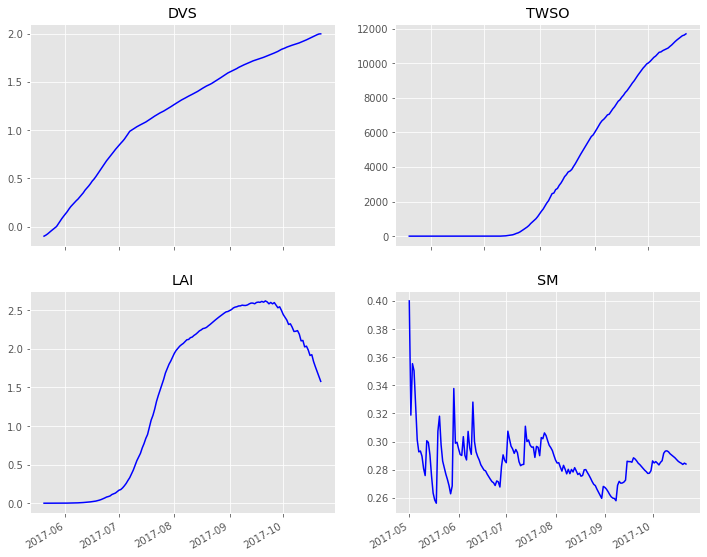

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TWSO", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()

# Visualization for sensitivity analysis

Plots by [Water programming group](https://waterprogramming.wordpress.com/2019/08/27/a-python-implementation-of-grouped-radial-convergence-plots-to-visualize-sobol-sensitivity-analysis-results/)

How to repeat: [Repo of SampleVIS](https://github.com/charlesrouge/SampleVis)

In [ ]:
import numpy as np
from SALib.analyze import sobol
from SALib.sample import saltelli
from fishery import fish_game
import matplotlib.pyplot as plt
import itertools
import math

### Why number of samples is important?

n= 50
n= 100
n= 150
n= 200
n= 250
n= 300
n= 350
n= 400
n= 450


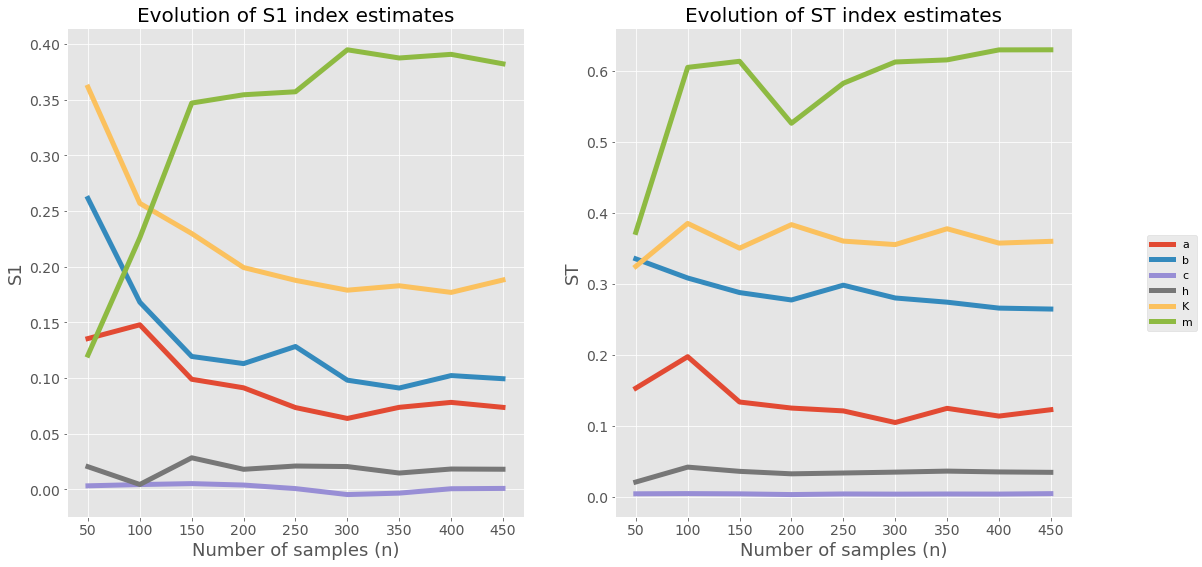

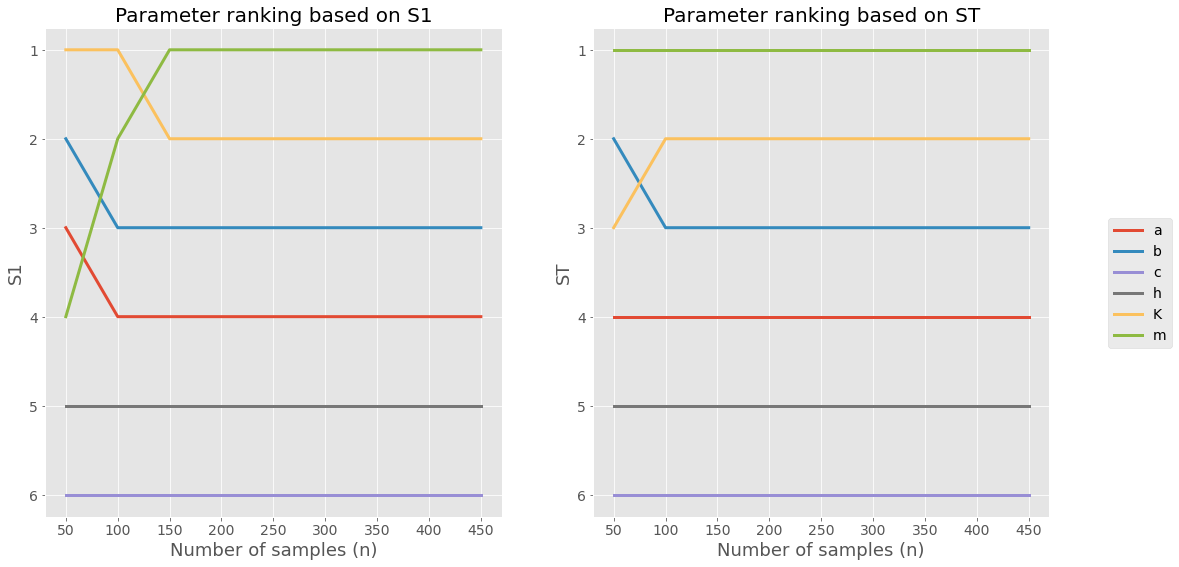

In [ ]:
# Set up dictionary with system parameters
problem = {
  'num_vars': 6,
  'names': ['a', 'b', 'c','h',
            'K','m'],
  'bounds': [[ 0.002, 2],
             [0.005, 1],
             [0.2, 1],
             [0.001, 1],
             [100, 5000],
             [0.1, 1.5]]
}

# Array with n's to use
nsamples = np.arange(50, 500, 50)

# Arrays to store the index estimates
S1_estimates = np.zeros([problem['num_vars'],len(nsamples)])
ST_estimates = np.zeros([problem['num_vars'],len(nsamples)])

# Loop through all n values, create sample, evaluate model and estimate S1 & ST
for i in range(len(nsamples)):
    print('n= '+ str(nsamples[i]))
    # Generate samples
    sampleset = saltelli.sample(problem, nsamples[i],calc_second_order=False)
    # Run model for all samples
    output = [fish_game(*sampleset[j,:]) for j in range(len(sampleset))]
    # Perform analysis
    results = sobol.analyze(problem, np.asarray(output), calc_second_order=False,print_to_console=False)
    # Store estimates
    ST_estimates[:,i]=results['ST']
    S1_estimates[:,i]=results['S1']

np.save('ST_estimates.npy', ST_estimates)
np.save('S1_estimates.npy', S1_estimates)

S1_estimates = np.load('S1_estimates.npy')
ST_estimates = np.load('ST_estimates.npy')

# Generate figure showing evolution of indices
fig =  plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(1,2,1)
handles = []
for j in range(problem['num_vars']):
    handles += ax1.plot(nsamples, S1_estimates[j,:], linewidth=5)
ax1.set_title('Evolution of S1 index estimates', fontsize=20)
ax1.set_ylabel('S1', fontsize=18)
ax1.set_xlabel('Number of samples (n)', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2 = fig.add_subplot(1,2,2)
for j in range(problem['num_vars']):
    ax2.plot(nsamples, ST_estimates[j,:], linewidth=5)
ax2.set_title('Evolution of ST index estimates', fontsize=20)
ax2.set_ylabel('ST', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Number of samples (n)', fontsize=18)
fig.legend(handles, problem['names'], loc = 'right', fontsize=11)
plt.show()
#plt.savefig('indexevolution.png')

# Calculate parameter rankings
S1_ranks = np.zeros_like(S1_estimates)
ST_ranks = np.zeros_like(ST_estimates)
for i in range(len(nsamples)):
    orderS1 = np.argsort(S1_estimates[:,i])
    orderST = np.argsort(ST_estimates[:,i])
    S1_ranks[:,i] = orderS1.argsort()
    ST_ranks[:,i] = orderST.argsort()
    
# Generate figure showing evolution of ranks
fig =  plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(1,2,1)
handles = []
for j in range(problem['num_vars']):
    handles += ax1.plot(nsamples, S1_ranks[j,:], linewidth=3)
ax1.set_title('Parameter ranking based on S1', fontsize=20)
ax1.set_ylabel('S1', fontsize=18)
ax1.set_xlabel('Number of samples (n)', fontsize=18)
ax1.set_yticklabels(np.arange(problem['num_vars']+1, 0, -1))
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2 = fig.add_subplot(1,2,2)
for j in range(problem['num_vars']):
    ax2.plot(nsamples, ST_ranks[j,:], linewidth=3)
ax2.set_title('Parameter ranking based on ST', fontsize=20)
ax2.set_ylabel('ST', fontsize=18)
ax2.set_yticklabels(np.arange(problem['num_vars']+1, 0, -1))
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Number of samples (n)', fontsize=18)
fig.legend(handles, problem['names'], loc = 'right', fontsize=14)
#plt.show()
#plt.savefig('rankingevolution.png')

## Radial plot for SA

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy import genfromtxt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
sns.set_style('whitegrid', {'axes_linewidth': 0, 'axes.edgecolor': 'white'})

## Plot function

In [ ]:
def is_significant(value, confidence_interval, threshold="conf"):
    if threshold == "conf":
        return value - abs(confidence_interval) > 0
    else:
        return value - abs(float(threshold)) > 0
 
def grouped_radial(SAresults, parameters, radSc=2.0, scaling=1, widthSc=0.5, STthick=1, varNameMult=1.3, colors=None, groups=None, gpNameMult=1.5, threshold="conf"):
    # Derived from https://github.com/calvinwhealton/SensitivityAnalysisPlots
    fig, ax = plt.subplots(1, 1)
    color_map = {}
     
    # initialize parameters and colors
    if groups is None:
         
        if colors is None:
            colors = ["k"]
         
        for i, parameter in enumerate(parameters):
            color_map[parameter] = colors[i % len(colors)]
    else:        
        if colors is None:
            colors = sns.color_palette("deep", max(3, len(groups)))
         
        for i, key in enumerate(groups.keys()):
            #parameters.extend(groups[key])
             
            for parameter in groups[key]:
                color_map[parameter] = colors[i % len(colors)]
     
    n = len(parameters)
    angles = radSc*math.pi*np.arange(0, n)/n
    x = radSc*np.cos(angles)
    y = radSc*np.sin(angles)
     
    # plot second-order indices
    for i, j in itertools.combinations(range(n), 2):
        #key1 = parameters[i]
        #key2 = parameters[j]
         
        if is_significant(SAresults["S2"][i][j], SAresults["S2_conf"][i][j], threshold):
            angle = math.atan((y[j]-y[i])/(x[j]-x[i]))
                 
            if y[j]-y[i] < 0:
                angle += math.pi
                 
            line_hw = scaling*(max(0, SAresults["S2"][i][j])**widthSc)/2
                 
            coords = np.empty((4, 2))
            coords[0, 0] = x[i] - line_hw*math.sin(angle)
            coords[1, 0] = x[i] + line_hw*math.sin(angle)
            coords[2, 0] = x[j] + line_hw*math.sin(angle)
            coords[3, 0] = x[j] - line_hw*math.sin(angle)
            coords[0, 1] = y[i] + line_hw*math.cos(angle)
            coords[1, 1] = y[i] - line_hw*math.cos(angle)
            coords[2, 1] = y[j] - line_hw*math.cos(angle)
            coords[3, 1] = y[j] + line_hw*math.cos(angle)
 
            ax.add_artist(plt.Polygon(coords, color="0.75"))
         
    # plot total order indices
    for i, key in enumerate(parameters):
        if is_significant(SAresults["ST"][i], SAresults["ST_conf"][i], threshold):
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["ST"][i]**widthSc)/2, color='w'))
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["ST"][i]**widthSc)/2, lw=STthick, color='0.4', fill=False))
     
    # plot first-order indices
    for i, key in enumerate(parameters):
        if is_significant(SAresults["S1"][i], SAresults["S1_conf"][i], threshold):
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["S1"][i]**widthSc)/2, color='0.4'))
            
    # add labels
    for i, key in enumerate(parameters):                
        ax.text(varNameMult*x[i], varNameMult*y[i], key, ha='center', va='center',
                rotation=angles[i]*360/(2*math.pi) - 90,
                color=color_map[key])
         
    if groups is not None:
        for i, group in enumerate(groups.keys()):
            print(group)
            group_angle = np.mean([angles[j] for j in range(n) if parameters[j] in groups[group]])
             
            ax.text(gpNameMult*radSc*math.cos(group_angle), gpNameMult*radSc*math.sin(group_angle), group, ha='center', va='center',
                rotation=group_angle*360/(2*math.pi) - 90,
                color=colors[i % len(colors)])
             
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.
    plt.axis('equal')
    plt.axis([-2*radSc, 2*radSc, -2*radSc, 2*radSc])
    #plt.show()
 
     
    return fig

## Range of soil parameters

In [ ]:
problem = {
    'num_vars':6,
    'names':['SOC', 'Sand', 'Clay', 'pH', 'CN', 'BD'],
    'bounds':[[2.58, 6.20],
              [0.01, 0.30],
              [0.01, 0.30],
              [4.6, 6.9],
              [10.9, 12.4],
              [900, 1350]]
}

In [ ]:
#names for csv files
list_of_csv=['soybean-000-2015.csv', 'sugar-beet-2011.csv', 'sugar-beet-2017.csv',
'spring-barley-2012.csv', 'sugar-beet-2014.csv']
list_of_names=['soybean-000-2015', 'sugar-beat-2011', 'sugar-beat-2017',
'spring-barley-2012', 'sugar-beat-2014']
list_of_totals=['total_SI_'+x for x in list_of_names]
list_of_first=['fisrt_SI_'+x for x in list_of_names]
list_of_second=['second_SI_'+x for x in list_of_names]
list_of_SI=['SI_'+x for x in list_of_names]

In [ ]:
for j, i in enumerate(list_of_csv):
        all_data_csv = genfromtxt('./'+str(i), delimiter=',')
        output = all_data_csv[:,2]
        print(i)
        list_of_SI[j] = sobol.analyze(problem, output, calc_second_order=True, conf_level=0.95, print_to_console=False)

soybean-000-2015.csv
sugar-beet-2011.csv
sugar-beet-2017.csv
spring-barley-2012.csv
sugar-beet-2014.csv


Soil physics
Soil chemistry


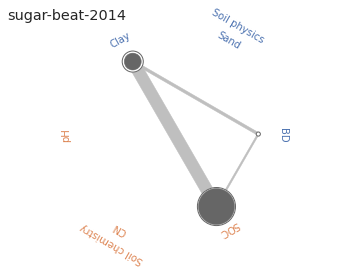

In [ ]:
groups={"Soil physics" : ["Sand", "Clay", "BD"],
        "Soil chemistry" : ["pH", "SOC", "CN"]}
 
fig = grouped_radial(list_of_SI[4], ['BD', 'Sand', 'Clay', 'pH', 'CN', 'SOC'], groups=groups, threshold=0.001)
red_patch = mpatches.Patch(color='red', label='The red data')
plt.title(list_of_names[4], loc='left')

plt.show()

## Homework

__[Tasks](https://skoltech-my.sharepoint.com/:w:/g/personal/mikhail_gasanov_skoltech_ru/EeTPQxbrzVdPqnSENKYyoTUBay1RDYgMMW3GO3qFT2ge5g?e=4hk45V)__

Usefull

__SA and UQ__


1) [Rhodium project](https://github.com/Project-Platypus/Rhodium.git)


2) [SALib](https://github.com/SALib/SALib)

__Model__

3) [PCSE](https://pcse.readthedocs.io/en/stable/index.html)

4) How to install PCSE at local machine
    `conda env create -f` [py3_pcse.yml](https://github.com/mishagrol/Seminar_Sobol/blob/master/py3_pcse.yml)

Аny questions  -  

Telegram - `@misha_grol`

Part 1 – Crop Yield Prediction (PCSE, MONICA)  

You can use the seminars’ colab:  

“https://colab.research.google.com/drive/1j4AHD8KkTRThPuNsQzQFWYSJtptQ6bUA”  

1) Assess the yield of one of the crops for the Moscow region over several years (potatoes, sugar beets for 2-3 years)   

    Crop  - (https://github.com/mishagrol/Seminar_Sobol/tree/master/data/crop) 

    Soil - (https://github.com/mishagrol/Seminar_Sobol/tree/master/data/soil) 

    Weather  - NASAdataprovider in PCSE (https://pcse.readthedocs.io/en/stable/code.html?highlight=NASA#pcse.db.NASAPowerWeatherDataProvider)   

    Agromanagement - (https://github.com/mishagrol/Seminar_Sobol/blob/master/data/agro/sugarbeet_calendar_Moscow_short.agro) 

Part 2 – Sensitivity Analysis (SALib)  

1) Perform sensitivity analysis of one of the model blocks (crop, soil, agromanagement *) with SALib. You can choose one of the methods that you consider necessary (Sobol, FAST, ...). 

    Generate samples – In report provide the size of the resulting matrix and the sample size (N) 

    Conduct parameter sensitivity analysis  - In report provide S1 and ST indices.  

2) Generate plots (Hist, Radial convergence plot, etc.)  

*3) Estimate the required number of simulations to obtain reliable values of the sensitivity indices. Try to estimate the sample size at the confidence interval of the sensitivity indices. 

* Please note that working with discrete data can cause certain difficulties. 

#Agro Hack https://agro-code.ru/

### bonus

__Morris method__


Generate a sample using the Method of Morris

Three variants of Morris' sampling for elementary effects is supported:

- Vanilla Morris
- Optimised trajectories when ``optimal_trajectories=True`` (using
    Campolongo's enhancements from 2007 and optionally Ruano's enhancement
    from 2012; ``local_optimization=True``)
- Groups with optimised trajectories when ``optimal_trajectories=True`` and
    the problem definition specifies groups (note that ``local_optimization``
    must be ``False``)

At present, optimised trajectories is implemented using either a brute-force
approach, which can be very slow, especially if you require more than four
trajectories, or a local method based which is much faster. Both methods now
implement working with groups of factors.

Note that the number of factors makes little difference,
but the ratio between number of optimal trajectories and the sample size
results in an exponentially increasing number of scores that must be
computed to find the optimal combination of trajectories.  We suggest going
no higher than 4 from a pool of 100 samples with the brute force approach.
With local_optimization = True (which is default),
it is possible to go higher than the previously suggested 4 from 100.



In [ ]:
import sys

from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.test_functions import Sobol_G
from SALib.util import read_param_file
from SALib.plotting.morris import horizontal_bar_plot, covariance_plot, \
    sample_histograms
import matplotlib.pyplot as plt

#sys.path.append('../..')

# Read the parameter range file and generate samples
#problem = read_param_file('/Users/mikhailgasanov/Documents/GIT/SALib/src/SALib/test_functions/params/Sobol_G.txt')
# or define manually without a parameter file:
problem = {
 'num_vars': 8,
 'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'],
 'groups': None,
 'bounds': [[0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0],
            [0.0, 1.0]]
}
# Files with a 4th column for "group name" will be detected automatically, e.g.
# param_file = '../../src/SALib/test_functions/params/Ishigami_groups.txt'

# Generate samples
param_values = sample(problem, N=1000, num_levels=4,
                      optimal_trajectories=None)

# To use optimized trajectories (brute force method),
# give an integer value for optimal_trajectories

# Run the "model" -- this will happen offline for external models
Y = Sobol_G.evaluate(param_values)

# Perform the sensitivity analysis using the model output
# Specify which column of the output file to analyze (zero-indexed)
Si = morris.analyze(problem, param_values, Y, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=100)
# Returns a dictionary with keys 'mu', 'mu_star', 'sigma', and 'mu_star_conf'
# e.g. Si['mu_star'] contains the mu* value for each parameter, in the
# same order as the parameter file

fig, (ax1, ax2) = plt.subplots(1, 2)
horizontal_bar_plot(ax1, Si, {}, sortby='mu_star', unit=r"tCO$_2$/year")
covariance_plot(ax2, Si, {}, unit=r"tCO$_2$/year")

fig2 = plt.figure()
sample_histograms(fig2, param_values, problem, {'color': 'y'})
plt.show()